# Testing Mango

In [1]:
import sys
sys.path.append('/Users/sansan01/Learning/Bayesian_Learning/Exp-19/AutoTuner/')
sys.path.append('/Users/sansan01/Learning/Bayesian_Learning/Exp-19/AutoTuner/classifiers')

In [2]:
from tuner import Tuner

In [15]:
from domain.distribution import loguniform

param_dict = {"changepoint_prior_scale": loguniform(-3, 1),
              'seasonality_prior_scale' : loguniform(-1, 2)
             }

# userObjective on Celery

In [16]:
from CeleryTasks import run_prophet

iteration_count = 1

def objective_Prophet(args_list):
    global iteration_count
    
    print('iteration_count:',iteration_count)
    
    iteration_count = iteration_count+1
    process_queue =[]
    
    for hyper_par in args_list:
        changepoint_prior_scale = hyper_par['changepoint_prior_scale']
        seasonality_prior_scale =  hyper_par['seasonality_prior_scale']
        process = run_prophet.delay(changepoint_prior_scale, seasonality_prior_scale)
        process_queue.append(process)
    
    results = []
    for process in process_queue:
        result = process.get(timeout=100)
        results.append(result)
           
    return results

In [17]:
conf_Dict = dict()
conf_Dict['batch_size'] = 4
conf_Dict['num_iteration'] = 5

# Defining Tuner

In [18]:
tuner_user = Tuner(param_dict, objective_Prophet,conf_Dict)

In [19]:
tuner_user.getConf()

{'param_dict': {'changepoint_prior_scale': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a20149f60>,
  'seasonality_prior_scale': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a20149ac8>},
 'userObjective': <function __main__.objective_Prophet(args_list)>,
 'domain_size': 5000,
 'initial_random': 1,
 'num_iteration': 5,
 'objective': 'maximize',
 'batch_size': 4}

In [20]:
results = tuner_user.run()

iteration_count: 1
iteration_count: 2
iteration_count: 3
iteration_count: 4
iteration_count: 5
iteration_count: 6


# Inspect the results

In [27]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'changepoint_prior_scale': 0.004467595715623072, 'seasonality_prior_scale': 0.15784878150168577}
best objective: -6616.1428250059835


In [28]:
print('Sample hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Sample hyper parameters tried: 21
[{'changepoint_prior_scale': 0.007301500970132781, 'seasonality_prior_scale': 0.1250477498037305}, {'changepoint_prior_scale': 0.0030764933474933557, 'seasonality_prior_scale': 9.9766680128947}]


In [29]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 21
[-6657.048025439818, -6688.334332572026, -8078.430470924487, -6654.35095380768, -8289.32075888712]


# Plotting the actual variation in objective values of the tried results

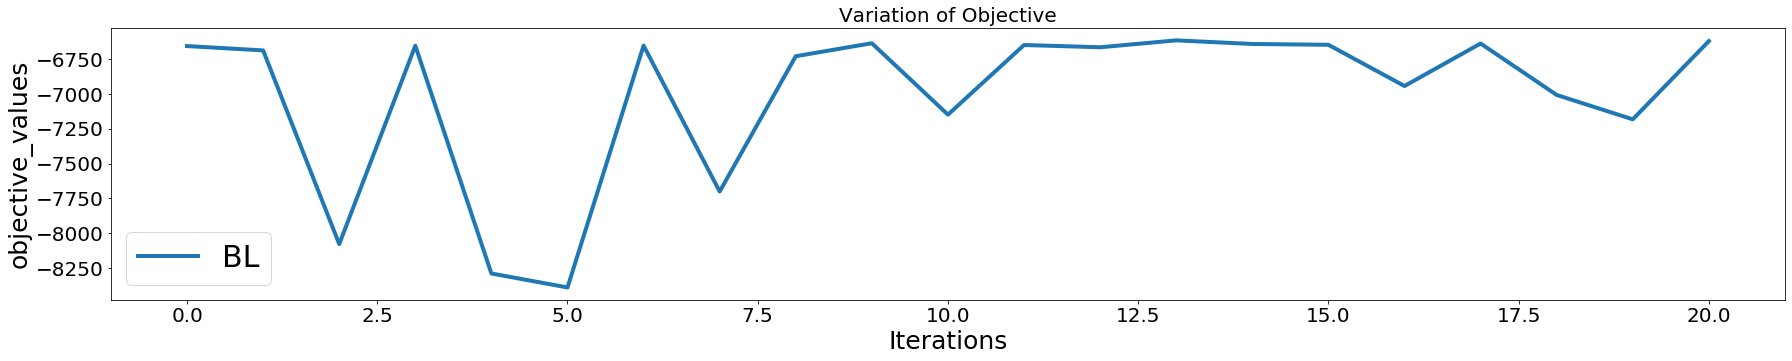

In [30]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

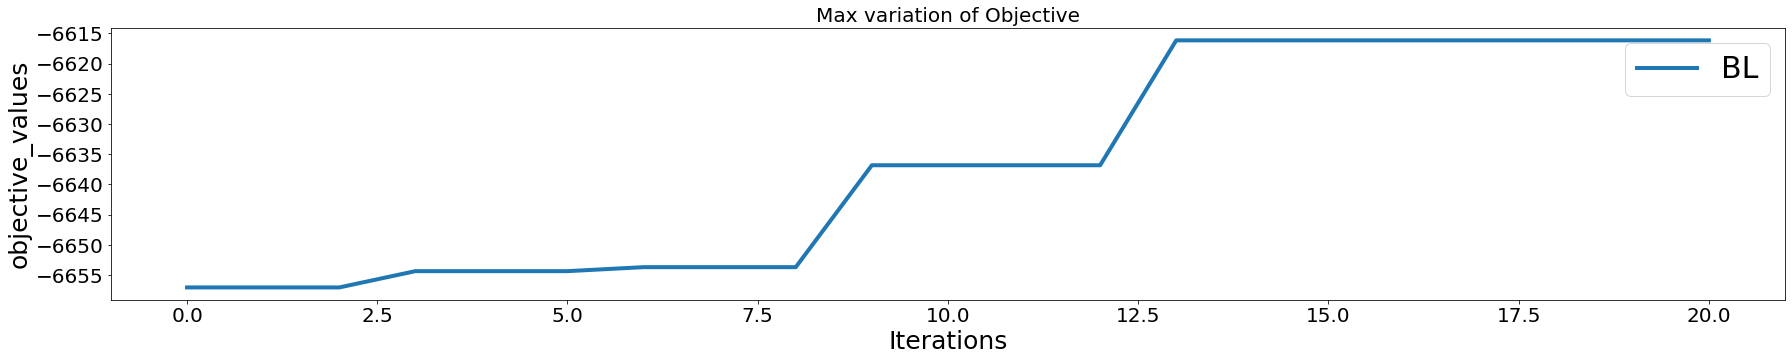

In [31]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [32]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_hyper_parameter': {   'changepoint_prior_scale': 0.004467595715623072,
                                'seasonality_prior_scale': 0.15784878150168577},
    'best_objective': -6616.1428250059835,
    'hyper_parameters_tried': [   {   'changepoint_prior_scale': 0.007301500970132781,
                                      'seasonality_prior_scale': 0.1250477498037305},
                                  {   'changepoint_prior_scale': 0.0030764933474933557,
                                      'seasonality_prior_scale': 9.9766680128947},
                                  {   'changepoint_prior_scale': 0.0012676644047368152,
                                      'seasonality_prior_scale': 5.1966593411944135},
                                  {   'changepoint_prior_scale': 0.009348410354194888,
                                      'seasonality_prior_scale': 5.1922070502577125},
                                  {   'changepoint_prior_scale': 0.0013157652765312352,
                